# CLUSTERING

- Name  : Zahrotul Nailul Izah
- Class   : AI-3
- Room  : Teknik Elektro, AJ-102

### The task which given

1.   Background
2.   Objective
3.   Related Work (Literature Review)
4.   Proposed Method
5.   Implementation
6.   Experiment Result
7.   Discussion
8.   Conclusion

### 1. Backgroud
- Given the clustering problem and its dataset, and is asked to develop a classification model to classify the dataset. clustering is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points  within  a  single  cluster are very similar and points in different clusters are different. 
- The clustering is unsupervised learning. Unsupervised learning does not aim to produce output in the response of the particular input instead it discovers patterns in data.  The analyzation of unsupervised learning is real-time. 
- To find an available parking space is not easy especially in a big city like Birmingham. The prediction of car park availability is the subject that has been studied in the context of smart cities. In a methodolody for predicting parking space availability in Intelligent Parking Reservation architectures is proposed. It consists of a real-time availability forecast algorithm that evaluates each parking requests according to drivers' preferences and parking availibility. They employ historical information of entering and leaving to update and predict the availability for each parking alternative. Based on the information, if we want to predict the data in real-time we can use the clustering method. 

### 2. Objective
- Data collected from car parks in Birmingham that are operated by NCP from Birmingham City Council in the United Kingdom, licensed under the Open Government License v3.0. It includes the car parks operated by NCP in that city and is updated every 30 minutes from 8 AM to 5 PM from 4th October – 19th  December 2016. The attributes information are system code number, capacity, occupancy, and LastUpdate. In the LastUpdate data (contain the data of years, months, dates, and hours in one column), so  we must  separate or split them became different columns. After that, I choose which data I want to use. In this analysis, I choose to use to cluster data from occupancy data and the day (from 4th October – 19th December). The content of an Occupancy data is about how many car in parking space, then the content of a day is about the date when the data taken. In this analysis, I will cluster the records into two. the ones are available and the ones are not available.

### 3. Related Work (Literature Review)
- According  to  Daniel  H,  and  etc they used some different training and testing sets to train their data (they also use Parking Birmingham dataset). They  have  trained  them  by  using  real  data  published  by  the  local  council  and presented the results obtained after testing them with one week of unseen parking data. Some methods are Polynomial Fitting (P), Fourier Series, k-Means Clustering, KM-Polynomials,  Shift  & Phase (SP), Time Series (TS). Based on their analysis, there is no clear winner but the time series predictor seems to show the best result. Shift  &  Phase  also  has  good results, especially if we take into account that it is simpler and requires just five parameters to predict a car park’s occupancy rate instead of a series of values. The k-Means Clustering and KM-Polynomials are the worst predictors as they are based on just the three clusters defined in training[1]. Based on that, I will also use the K-Means Clustering to know or compare if the result of the clustering will be the same or not.


### 4. Proposed Method
- There are some methods which can used to clustering data, but in this analysis I will use K-Means Clustering. k-Means Clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points  that  are  assigned  to  it.  The  algorithm  is  finished  when  the assignment of instances to clusters no longer changes. In this analysis, I will cluster the records into two. the ones are available and the ones are not available to find at what time when the driver search availability parking space to parking.

### 5. Implementation
- This following method of K-Means Clustering which I use:

**Install Python packages**

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Input the data which I will use

In [7]:
dataset = 'dataset.csv'
dataset_file = open(dataset, 'r')
datf = pd.read_csv(dataset_file, index_col=0)
datf.head(10) # this mean if the data will show 10 rows, the default is 5 rows

,Capacity,Occupancy,LastUpdated
SystemCodeNumber,,,
BHMBCCMKT01,577,61,2016-10-04 07:59:42
BHMBCCMKT01,577,64,2016-10-04 08:25:42
BHMBCCMKT01,577,80,2016-10-04 08:59:42
BHMBCCMKT01,577,107,2016-10-04 09:32:46
BHMBCCMKT01,577,150,2016-10-04 09:59:48
BHMBCCMKT01,577,177,2016-10-04 10:26:49
BHMBCCMKT01,577,219,2016-10-04 10:59:48
BHMBCCMKT01,577,247,2016-10-04 11:25:47
BHMBCCMKT01,577,259,2016-10-04 11:59:44


Because the time data above become one columns and will be difficult to analysis , I will separate them to each columns

In [8]:
#categorical encoding
datf['year'] = datf['LastUpdated'].map(lambda x: int(x.split(" ")[0].split("-")[0]))
datf['month'] = datf['LastUpdated'].map(lambda x: int(x.split(" ")[0].split("-")[1]))
datf['day'] = datf['LastUpdated'].map(lambda x: int(x.split(" ")[0].split("-")[2]))
datf['hour'] = datf['LastUpdated'].map(lambda x: int(x.split(" ")[1].split(":")[0]))
datf.drop(['LastUpdated'], axis=1, inplace=True)

In [9]:
datf.head(10)

,Capacity,Occupancy,year,month,day,hour
SystemCodeNumber,,,,,,
BHMBCCMKT01,577,61,2016,10,4,7
BHMBCCMKT01,577,64,2016,10,4,8
BHMBCCMKT01,577,80,2016,10,4,8
BHMBCCMKT01,577,107,2016,10,4,9
BHMBCCMKT01,577,150,2016,10,4,9
BHMBCCMKT01,577,177,2016,10,4,10
BHMBCCMKT01,577,219,2016,10,4,10
BHMBCCMKT01,577,247,2016,10,4,11
BHMBCCMKT01,577,259,2016,10,4,11


I want to check if there are missing values or not. 

In [74]:
# to know or check what file is missing
datf.isna().head(10)

,Capacity,Occupancy,year,month,day,hour
SystemCodeNumber,,,,,,
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False
BHMBCCMKT01,False,False,False,False,False,False


In [75]:
print(datf.isna().sum())

Capacity     0
Occupancy    0
year         0
month        0
day          0
hour         0
dtype: int64


Based on the data above, there are no missing values. In this step, I start to build a K-Means Model. I want to check one again if the data which I used have the same types

In [76]:
# to see the data types of different features 
datf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35717 entries, BHMBCCMKT01 to Shopping
Data columns (total 6 columns):
Capacity     35717 non-null int64
Occupancy    35717 non-null int64
year         35717 non-null int64
month        35717 non-null int64
day          35717 non-null int64
hour         35717 non-null int64
dtypes: int64(6)
memory usage: 1.9+ MB


I drop some features which I will not use. I just use 'Occupancy' and 'day'. 

In [10]:
parkir_X = datf.drop(['Capacity', 'year', 'month', 'hour'], axis=1)
parkir_X.head()

,Occupancy,day
SystemCodeNumber,,
BHMBCCMKT01,61,4
BHMBCCMKT01,64,4
BHMBCCMKT01,80,4
BHMBCCMKT01,107,4
BHMBCCMKT01,150,4


In [11]:
from sklearn.cluster import KMeans

In [12]:
X_array = np.array(parkir_X)
print(X_array)

[[  61    4]
 [  64    4]
 [  80    4]
 ...
 [1432   19]
 [1321   19]
 [1180   19]]


In this analysis, I will cluster the records into two. the ones are available and the ones are not availabe to find at what time when the driver search availability parking space to parking. It shows from n_clusters = 2

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_array)
y_kmeans = kmeans.predict(X_array)

I will see how well the model is doing by looking at the percentage of the data that were clustered correctly

In [27]:
correct = 0
for i in range(len(X_array)):
    predict_me = np.array(X_array[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1
        
print(correct/len(X_array))

1.0


Based on the data above, the model was able to cluster correctly with a 100%. So in order to know whether by fixing the parameter of the model will affect it or not, I will enhance the performance. Some parameters which the scikit-learn implementation of K-Means provides :
1. algorithm
2. max_iter
3. n_jobs

the default value of max_iter in this model is 300, so I will increase it.

In [39]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
correct = 0
for i in range(len(X_array)):
    predict_me = np.array(X_array[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1
        
print(correct/len(X_array))

0.9992160595794719


The result is a decrease in the score. One of the reasons being I have not scaled the values of the different features that I am feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not effect the other feature. So I will scaled the data:

In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_array)

In [42]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
correct = 0
for i in range(len(X_array)):
    predict_me = np.array(X_array[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1
        
print(correct/len(X_array))

0.8686339838172299


The data increase than before. That is the accuracy of this model. So I will show the data using a scatter method

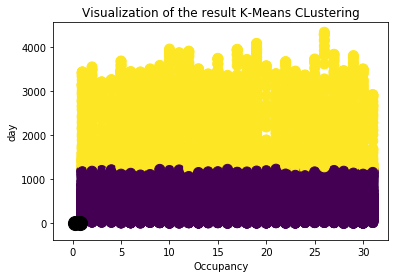

In [45]:
result = plt.scatter(X_array[:, 1], X_array[:, 0], c=y_kmeans, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=1)
plt.xlabel('Occupancy')
plt.ylabel('day')
plt.title("Visualization of the result K-Means CLustering")

plt.show()

### 6. Experiment result
Based on the data above, the result is, the model was able to cluster correctly 86%. The first prediction is 100%, then in order to know whether by fixing the parameter of the model will affect it or not, I will enhance the performance. The result is 99%. The model decrease about 1%. One of the reasons being I have not scaled the values of the different features that I am feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not effect the other feature. So I will scaled the data. After I scaled the data, the result is 86%. That decrease about 13%. The last prediction is the final result of this model clustering. 

### 7. Discussion
If we have to compare the result of this model analysis with the result of another author, we will know if the result is different. Another author said if the K-Means Clustering was the worst predictors as they are based on just the three clusters defined in training. They choose to cluster into 3 clusters then the result is not good, but in this analysis, I cluster the records into 2. the ones are available and the ones are not availabe to find at what time when the driver search availability parking space to parking. So the biggest disadvantage is that K-Means requires to pre-specify the number of clusters (k). Hierarchical clustering is an alternative approach that does not require a particular choice of clusters. An additional disadvantage of K-Means is that it is sensitive to outliers and different results can occur if I change the ordering of the data. K-Means is not a good learner where generalization of the training data is delayed until a query is made to the system. This means K-Means starts working only when I trigger it to, this method can construct a different approximation or result in the target function for each encountered query.

### 8. Conclusion
So in this analysis, if I cluster into 2 clusters the result will be good and has the accuracy of around 86%. But if you change another value or increase the cluster the data is not good. Because the number of clusters in the K-Means Clustering has an effect on the data.

Source:

- [1]       Daniel  H,  and  etc.2017.Predicting  Car  Park  Occupancy  Rates  in  Smart  Cities. Univeristy of Birmingham: the United Kingdom.
- [2]       Andreas  C.M and Sarah G.2017.Introduction to Machine Learning with Python-A Guide for Data Science. The United States of America.


Note :
- You can find the data in this link:
- [Parking Birmingham][https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham]